In [0]:
import tensorflow as tf

from keras.datasets import fashion_mnist

mnist = tf.keras.datasets.fashion_mnist
(train_img, train_lbl), (test_img, test_lbl) = mnist.load_data()

train_img = train_img.reshape(60000, 28, 28, 1)
test_img = test_img.reshape(10000, 28, 28, 1)

train_img = train_img/255
test_img = test_img/255

In [0]:
import numpy as np

p0=p1=p2=p3=p4=p5=p6=p7=p8=p9=j=i=0
train_img_800=np.zeros((8000,28,28,1))
train_lbl_800=np.zeros((8000,1))
for i in range(len(train_lbl)):
    if j<8000:
        if train_lbl[i]==0:
            if p0<800:
                train_img_800[j,:]=train_img[i,:]
                train_lbl_800[j]=train_lbl[i]
                j=j+1
                p0=p0+1
        if train_lbl[i]==1:
            if p1<800:
                train_img_800[j,:]=train_img[i,:]
                train_lbl_800[j]=train_lbl[i]
                j=j+1
                p1=p1+1
        if train_lbl[i]==2:
            if p2<800:
                train_img_800[j,:]=train_img[i,:]
                train_img_800[j]=train_lbl[i]
                j=j+1
                p2=p2+1
        if train_lbl[i]==3:
            if p3<800:
                train_img_800[j,:]=train_img[i,:]
                train_lbl_800[j]=train_lbl[i]
                j=j+1
                p3=p3+1
        if train_lbl[i]==4:
            if p4<800:
                train_img_800[j,:]=train_img[i,:]
                train_lbl_800[j]=train_lbl[i]
                j=j+1
                p4=p4+1
        if train_lbl[i]==5:
            if p5<800:
                train_img_800[j,:]=train_img[i,:]
                train_lbl_800[j]=train_lbl[i]
                j=j+1
                p5=p5+1
        if train_lbl[i]==6:
            if p6<800:
                train_img_800[j,:]=train_img[i,:]
                train_lbl_800[j]=train_lbl[i]
                j=j+1
                p6=p6+1
        if train_lbl[i]==7:
            if p7<800:
                train_img_800[j,:]=train_img[i,:]
                train_lbl_800[j]=train_lbl[i]
                j=j+1
                p7=p7+1
        if train_lbl[i]==8:
            if p8<800:
                train_img_800[j,:]=train_img[i,:]
                train_lbl_800[j]=train_lbl[i]
                j=j+1
                p8=p8+1
        if train_lbl[i]==9:
            if p9<800:
                train_img_800[j,:]=train_img[i,:]
                train_lbl_800[j]=train_lbl[i]
                j=j+1
                p9=p9+1

In [1]:
train_img_800.shape

NameError: ignored

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([Conv2D(64,(3,3), activation='relu', input_shape=(28,28,1)),
                    MaxPooling2D(2,2),
                    Conv2D(64,(3,3), activation='relu'),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')])

In [0]:
from keras import optimizers

model.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# model.summary()

In [0]:
import timeit

tic = timeit.default_timer()
trained_model = model.fit(train_img_800, train_lbl_800, batch_size=32, epochs=30,  verbose=1, validation_split=0.05)
toc = timeit.default_timer()

print('Time: ', toc - tic) 

Train on 7600 samples, validate on 400 samples
Epoch 1/30
7600/7600 [==============================] - 3s 342us/step - loss: 0.6220 - acc: 0.7729 - val_loss: 0.3933 - val_acc: 0.8525
Epoch 2/30
7600/7600 [==============================] - 2s 266us/step - loss: 0.3443 - acc: 0.8739 - val_loss: 0.3398 - val_acc: 0.8675
Epoch 3/30
7600/7600 [==============================] - 2s 265us/step - loss: 0.2894 - acc: 0.8972 - val_loss: 0.3662 - val_acc: 0.8475
Epoch 4/30
7600/7600 [==============================] - 2s 264us/step - loss: 0.2590 - acc: 0.9049 - val_loss: 0.3324 - val_acc: 0.8850
Epoch 5/30
7600/7600 [==============================] - 2s 259us/step - loss: 0.2299 - acc: 0.9155 - val_loss: 0.4603 - val_acc: 0.8200
Epoch 6/30
7600/7600 [==============================] - 2s 267us/step - loss: 0.2092 - acc: 0.9201 - val_loss: 0.3773 - val_acc: 0.8500
Epoch 7/30
7600/7600 [==============================] - 2s 273us/step - loss: 0.1922 - acc: 0.9264 - val_loss: 0.3103 - val_acc: 0.8950
E

In [0]:
history = trained_model.history
acc_val = history['val_acc']
acc_tra = history['acc']

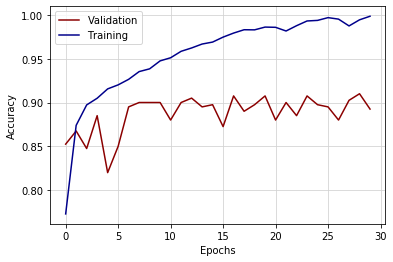

In [0]:
import matplotlib.pyplot as plt

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(acc_val, 'darkred')
plt.plot(acc_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()